In [87]:
import os
os.chdir(os.getcwd())

# Import Module

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn import metrics
from sklearn.cluster import KMeans

import matplotlib as mpl
%matplotlib inline
mpl.font_manager.fontManager.addfont('../thsarabunnew-webfont.ttf')
sns.set(font='TH Sarabun New')


# Import Data 

In [89]:
# Code
df = pd.read_excel('assignment2_clustering_data.xlsx',sheet_name='2564')
df.tail()

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
28,หน่วยงานอื่นของรัฐ,-,-,-,563.2,-,563.2
29,สภากาชาดไทย,-,-,-,8871.6,-,8871.6
30,ส่วนราชการในพระองค์,-,-,-,8980.9,-,8980.9
31,ทุนหมุนเวียน,-,-,-,19916.6,203108.1,223024.7
32,รวมทั้งสิ้น,641434.7,234204.2,500113.7,1117797.4,792412.5,3285962.5


# Part 1

ใช้งบประมาณรายจ่ายส่วนย่อย 5 ด้าน ในปี 2564 จัดกลุ่มกระทรวงตามงบประมาณรายจ่าย ด้วยวิธี K-mean, Hierarchical และ DBScan   ในแต่ละวิธี  ให้เหตุผลในการเลือก ค่า parameter ในการทำ clustering   ระบุว่า วิธีใด ให้ผลลัพธ์ Clustering ที่ดีที่สุด อภิปรายเหตุผล ว่า เพราะเหตุใดจึงเป็นเช่นนั้่น

# K-mean

In [90]:
# Code
main_2564=pd.read_excel('assignment2_clustering_data.xlsx', sheet_name='2564').drop(32)
main_2564.tail()

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
27,องค์กรปกครองส่วนท้องถิ่น,-,-,-,91348.5,-,91348.5
28,หน่วยงานอื่นของรัฐ,-,-,-,563.2,-,563.2
29,สภากาชาดไทย,-,-,-,8871.6,-,8871.6
30,ส่วนราชการในพระองค์,-,-,-,8980.9,-,8980.9
31,ทุนหมุนเวียน,-,-,-,19916.6,203108.1,223024.7


In [91]:
#k_mean_2564_drop = k_mean_2564.drop("รวม",axis=1).drop(32)
#df = orig_df[['Pclass','Age','SibSp', 'Parch','Fare']]
k_mean_2564_1=main_2564[['งบบุคลากร']]
k_mean_2564_1.replace({'-':np.nan},inplace=True)
k_mean_2564_1=k_mean_2564_1.dropna()
k_mean_2564_1.tail()

C:\Users\TTCOM\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,งบบุคลากร
17,2321.9
18,223199.6
19,107548.0
20,1635.9
21,82025.0


In [92]:
''' 

    CODE FOR CUT OUTLINER

'''

' \n\n    CODE FOR CUT OUTLINER\n\n'

<AxesSubplot:>

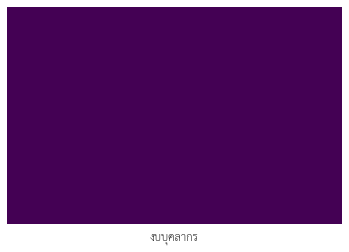

In [93]:
sns.heatmap(k_mean_2564_1.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [94]:
k_mean_2564_1.describe()

,งบบุคลากร
count,22.000000
mean,29156.122727
std,53267.919959
min,822.000000
25%,2415.750000
50%,10034.150000
75%,18395.150000
max,223199.600000


In [95]:
# ทด
# k_mean_2564_drop

In [96]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(k_mean_2564_1)
k_mean_2564_1_normalized = pd.DataFrame(array_normalized)
k_mean_2564_1_normalized.head()

,0
0,-0.262400
1,-0.481362
2,1.188844
3,-0.310663
4,-0.508401


In [100]:
k_mean_2564_1_normalized.describe()

,0
count,2.200000e+01
mean,-2.018587e-17
std,1.023533e+00
min,-5.444346e-01
25%,-5.138110e-01
50%,-3.674250e-01
75%,-2.067700e-01
max,3.728507e+00


Text(0, 0.5, 'SSE')

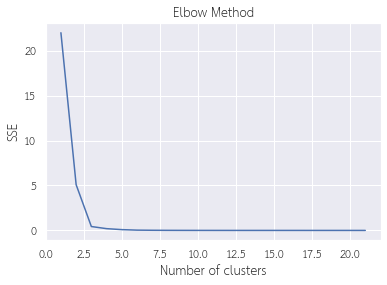

In [102]:
max_k = 22
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(k_mean_2564_1_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [109]:
k_1=3

In [110]:
kmeans_1 = KMeans(n_clusters=k_1)
kmeans_1.fit(k_mean_2564_1_normalized)

KMeans(n_clusters=5)

In [112]:
cluster_predictions = kmeans_1.predict(k_mean_2564_1_normalized)
k_mean_2564_1['cluster_id'] = cluster_predictions
k_mean_2564_1

,งบบุคลากร,cluster_id
0,15500.0,0
1,4104.5,3
2,91027.4,1
3,12988.2,0
4,2697.3,3
5,1572.6,3
6,2746.6,3
7,11248.4,0
8,24376.6,0
9,9704.7,0


In [113]:
k_mean_2564_1.cluster_id.value_counts()

3    10
0     8
1     2
2     1
4     1
Name: cluster_id, dtype: int64

In [118]:
print(metrics.silhouette_score(k_mean_2564_1,kmeans_1.labels_))

0.6392490245052856


In [119]:
print(metrics.davies_bouldin_score(k_mean_2564_1,kmeans_1.labels_))

0.25447544272734657


# Hierarchical

In [97]:
# Code

# DBScan

In [98]:
# Code

# Part 2

ใช้งบประมาณรายจ่ายส่วนย่อย 5 ด้าน ในปี 2560-2564  จัดกลุ่มกระทรวงตามงบประมาณรายจ่าย แยกตามปี (ไม่รวมทุกปีเข้าด้วยกัน)  ด้วยวิธี K-mean


In [99]:
# Code